<h1><div align="center">MNIST Database</div></h1>

# <img src="https://imgur.com/LHGvkC1.png"></img>

# 1. Introduction, what is MNIST?

The set of images in the MNIST database consist of digits written by high school students and employees of the United States Census Bureau. The MNIST database contains 60,000 training images and 10,000 testing images. Note this information was taken from wikipedia

# 2. Reading in the date and data exploration

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import gzip

np.random.seed(1212)

import keras
from keras.models import Model
from keras.layers import *
from keras import optimizers

import pandas as pd 
import matplotlib.pyplot as plt #for plotting
from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

plt.style.use('ggplot')
sns.set_style('whitegrid')


Using TensorFlow backend.


In [2]:
with gzip.open('/Users/rossheaney/Desktop/Workspace/FourthYear/ET/project/G00345608/MNIST_Datset_Files/t10k-images-idx3-ubyte.gz', 'rb') as f:
    file_content1 = f.read()
    
with gzip.open('/Users/rossheaney/Desktop/Workspace/FourthYear/ET/project/G00345608/MNIST_Datset_Files/train-images-idx3-ubyte.gz', 'rb') as f:
    file_content2 = f.read()

    
with gzip.open('/Users/rossheaney/Desktop/Workspace/FourthYear/ET/project/G00345608/MNIST_Datset_Files/t10k-labels-idx1-ubyte.gz', 'rb') as f:
    label_content1 = f.read()
    
with gzip.open('/Users/rossheaney/Desktop/Workspace/FourthYear/ET/project/G00345608/MNIST_Datset_Files/train-labels-idx1-ubyte.gz', 'rb') as f:
    label_content2 = f.read()


Magic number is outputted

In [3]:
int.from_bytes(file_content1[0:4], byteorder='big')

2051

The number of images is outputted

In [4]:
int.from_bytes(file_content1[5:8], byteorder='big')

10000

testing the data so we know what to expect

In [5]:
row = int.from_bytes(file_content1[8:12], byteorder='big')
col = int.from_bytes(file_content1[12:16], byteorder='big')
tot = row*col

print("Rows: ", row,"\nColumns: ", col,"\nTotal: ", tot)

Rows:  28 
Columns:  28 
Total:  784


Output a plot of the image using matplotlib

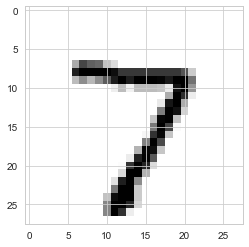

In [6]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

image = ~np.array(list(file_content1[16:800])).reshape(28,28).astype(np.uint8)

plt.imshow(image, cmap='gray')

In [7]:
import cv2

cv2.imwrite('test.png', image)

True

So what we have seen above is that the data is correct so now we can proceed

We will now discuss the code to save the images properly so we can train our model


# Doing some exploration

The biggest problem with the current dataset is that it's in a very unfriendly format.
I will explore how to convert to CSV and I will explore the CSV files below

## Exploration of the CSV files

### I am using the MNIST in csv format to explore the data and build the model.

Lets have a look at what we are dealing with!

In [8]:
train = pd.read_csv("/Users/rossheaney/Desktop/Workspace/FourthYear/ET/project/G00345608/MNIST_Datset_Files/train.csv")
test = pd.read_csv("/Users/rossheaney/Desktop/Workspace/FourthYear/ET/project/G00345608/MNIST_Datset_Files/test.csv")

display(train.info())

display(test.info())

display(train.head(n = 2))
display(test.head(n = 2))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


None

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### This figure shows the distribution of the numbers across the training dataset

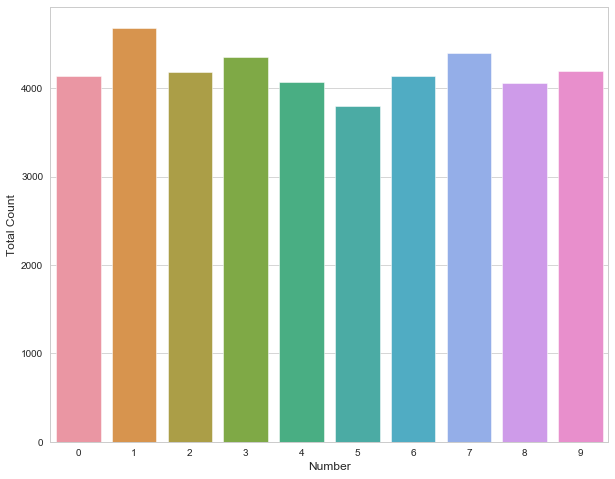

In [9]:
sns.countplot(x = "label", data = train)
fig = plt.gcf()
fig.set_size_inches(10, 8)
plt.xlabel("Number")
plt.ylabel("Total Count")
plt.show()

Purely integer-location based indexing for selection by position.

.iloc[] is primarily integer position based (from 0 to length-1 of the axis), but may also be used with a boolean array.

That's what I'm doing here. Further reading on iloc and pandas in general can be found at ===> https://pandas.pydata.org/pandas-docs/stable/

In [10]:
df_features = train.iloc[:, 1:785]
df_label = train.iloc[:, 0]

X_test = test.iloc[:, 0:784]

print(X_test.shape)

(28000, 784)


Lets spilt our training data up. We need to split it up randomly as we need to train our model and also test it on unseen data. If we train and test our model on the same data then the accuracy result is obviously going to be heavily skewed 

In [11]:
X_train, X_cv, y_train, y_cv = train_test_split(df_features, df_label, 
                                                test_size = 0.2,
                                                random_state = 1212)

X_train = X_train.as_matrix().reshape(33600, 784) #(33600, 784)
X_cv = X_cv.as_matrix().reshape(8400, 784) #(8400, 784)

X_test = X_test.as_matrix().reshape(28000, 784)

In [12]:
print((min(X_train[1]), max(X_train[1])))

(0, 255)


The result of standardization (or Z-score normalization) is that the features will be rescaled so that they’ll have the properties of a standard normal distribution with $$μ=0  and  σ=1$$

where μ is the mean (average) and σ is the standard deviation from the mean; standard scores (also called z scores) of the samples are calculated as follows:

$$z=x−μσ$$

Standardizing the features so that they are centered around 0 with a standard deviation of 1 is not only important if we are comparing measurements that have different units but it's also very necessary for many of these alogorithms to work. I have adopted the above from =====> https://sebastianraschka.com/Articles/2014_about_feature_scaling.html

In [13]:
# Feature Normalization 
X_train = X_train.astype('float32'); X_cv= X_cv.astype('float32'); X_test = X_test.astype('float32')
X_train /= 255; X_cv /= 255; X_test /= 255

# Convert labels to One Hot Encoded
num_digits = 10
y_train = keras.utils.to_categorical(y_train, num_digits)
y_cv = keras.utils.to_categorical(y_cv, num_digits)

In [14]:
# Printing 2 examples of labels after conversion
print(y_train[0]) # 2
print(y_train[3]) # 7

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


### Explaination of what is below

Below is several neural networks. We will examine the models and the most accurate will be chosen as our model to test our data.

This model contains a neural networks with an activation function set to ReLu. ReLu stands forrectified linear unit and can be mathematically defined as $$ y = max(0, x) $$

In [15]:
# Input Parameters
n_input = 784 # number of features
n_hidden_1 = 300
n_hidden_2 = 100
n_hidden_3 = 100
n_hidden_4 = 200
num_digits = 10

Here we're basically defining our input so that our neural network knows what to expect and how to handle the layers

In [16]:
Inp = Input(shape=(784,))
x = Dense(n_hidden_1, activation='relu', name = "Hidden_Layer_1")(Inp)
x = Dense(n_hidden_2, activation='relu', name = "Hidden_Layer_2")(x)
x = Dense(n_hidden_3, activation='relu', name = "Hidden_Layer_3")(x)
x = Dense(n_hidden_4, activation='relu', name = "Hidden_Layer_4")(x)
output = Dense(num_digits, activation='softmax', name = "Output_Layer")(x)


In [17]:
# Our model would have '6' layers - input layer, 4 hidden layer and 1 output layer
model = Model(Inp, output)
model.summary() # We have 297,910 parameters to estimate


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
Hidden_Layer_1 (Dense)       (None, 300)               235500    
_________________________________________________________________
Hidden_Layer_2 (Dense)       (None, 100)               30100     
_________________________________________________________________
Hidden_Layer_3 (Dense)       (None, 100)               10100     
_________________________________________________________________
Hidden_Layer_4 (Dense)       (None, 200)               20200     
_________________________________________________________________
Output_Layer (Dense)         (None, 10)                2010      
Total params: 297,910
Trainable params: 297,910
Non-trainable params: 0
_________________________________________________________________


In [18]:
# Insert Hyperparameters
learning_rate = 0.1
training_epochs = 20
batch_size = 100
sgd = optimizers.SGD(lr=learning_rate)

For more information on optimizers and why we use them etc... ===> https://keras.io/optimizers/

In [19]:
# We rely on the plain vanilla Stochastic Gradient Descent as our optimizing methodology
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [20]:
history1 = model.fit(X_train, y_train,
                     batch_size = batch_size,
                     epochs = training_epochs,
                     verbose = 2,
                     validation_data=(X_cv, y_cv))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 33600 samples, validate on 8400 samples
Epoch 1/20
 - 5s - loss: 1.8541 - acc: 0.4984 - val_loss: 1.0046 - val_acc: 0.7601
Epoch 2/20
 - 4s - loss: 0.6481 - acc: 0.8293 - val_loss: 0.4640 - val_acc: 0.8719
Epoch 3/20
 - 5s - loss: 0.4102 - acc: 0.8831 - val_loss: 0.3622 - val_acc: 0.8975
Epoch 4/20
 - 7s - loss: 0.3378 - acc: 0.9028 - val_loss: 0.3122 - val_acc: 0.9102
Epoch 5/20
 - 4s - loss: 0.2981 - acc: 0.9137 - val_loss: 0.2892 - val_acc: 0.9179
Epoch 6/20
 - 3s - loss: 0.2685 - acc: 0.9226 - val_loss: 0.2652 - val_acc: 0.9240
Epoch 7/20
 - 3s - loss: 0.2454 - acc: 0.9297 - val_loss: 0.2556 - val_acc: 0.9257
Epoch 8/20
 - 3s - loss: 0.2274 - acc: 0.9352 - val_loss: 0.2322 - val_acc: 0.9335
Epoch 9/20
 - 3s - loss: 0.2103 - acc: 0.9377 - val_loss: 0.2176 - val_acc: 0.9362
Epoch 10/20
 - 3s - loss: 0.1953 - acc: 0.9440 - val_loss: 0.2053 - val_acc: 0.9394
Epoch 11/20
 - 3s - loss:

Lets change the optimizer and see if we can get a better score

In [21]:
Inp = Input(shape=(784,))
x = Dense(n_hidden_1, activation='relu', name = "Hidden_Layer_1")(Inp)
x = Dense(n_hidden_2, activation='relu', name = "Hidden_Layer_2")(x)
x = Dense(n_hidden_3, activation='relu', name = "Hidden_Layer_3")(x)
x = Dense(n_hidden_4, activation='relu', name = "Hidden_Layer_4")(x)
output = Dense(num_digits, activation='softmax', name = "Output_Layer")(x)

# We rely on ADAM as our optimizing methodology
adam = keras.optimizers.Adam(lr=learning_rate)
model2 = Model(Inp, output)

model2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [22]:
history2 = model2.fit(X_train, y_train,
                      batch_size = batch_size,
                      epochs = training_epochs,
                      verbose = 2,
                      validation_data=(X_cv, y_cv))



Train on 33600 samples, validate on 8400 samples
Epoch 1/20
 - 7s - loss: 0.3422 - acc: 0.8973 - val_loss: 0.1610 - val_acc: 0.9476
Epoch 2/20
 - 5s - loss: 0.1267 - acc: 0.9606 - val_loss: 0.1188 - val_acc: 0.9624
Epoch 3/20
 - 5s - loss: 0.0832 - acc: 0.9738 - val_loss: 0.1004 - val_acc: 0.9696
Epoch 4/20
 - 5s - loss: 0.0612 - acc: 0.9799 - val_loss: 0.0998 - val_acc: 0.9707
Epoch 5/20
 - 5s - loss: 0.0437 - acc: 0.9855 - val_loss: 0.1017 - val_acc: 0.9712
Epoch 6/20
 - 5s - loss: 0.0399 - acc: 0.9865 - val_loss: 0.0991 - val_acc: 0.9731
Epoch 7/20
 - 5s - loss: 0.0288 - acc: 0.9908 - val_loss: 0.1202 - val_acc: 0.9694
Epoch 8/20
 - 5s - loss: 0.0263 - acc: 0.9917 - val_loss: 0.0921 - val_acc: 0.9763
Epoch 9/20
 - 5s - loss: 0.0234 - acc: 0.9923 - val_loss: 0.1102 - val_acc: 0.9740
Epoch 10/20
 - 5s - loss: 0.0250 - acc: 0.9915 - val_loss: 0.1014 - val_acc: 0.9755
Epoch 11/20
 - 5s - loss: 0.0204 - acc: 0.9931 - val_loss: 0.1092 - val_acc: 0.9756
Epoch 12/20
 - 5s - loss: 0.0161 - a

### Lets try something different here

In [23]:
Inp = Input(shape=(784,))
x = Dense(n_hidden_1, activation='relu', name = "Hidden_Layer_1")(Inp)
x = Dense(n_hidden_2, activation='relu', name = "Hidden_Layer_2")(x)
x = Dense(n_hidden_3, activation='relu', name = "Hidden_Layer_3")(x)
x = Dense(n_hidden_4, activation='relu', name = "Hidden_Layer_4")(x)
output = Dense(num_digits, activation='softmax', name = "Output_Layer")(x)

learning_rate = 0.01
adam = keras.optimizers.Adam(lr=learning_rate)
model2a = Model(Inp, output)

model2a.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Fitting our model 

In [24]:
history2a = model2a.fit(X_train, y_train,
                        batch_size = batch_size,
                        epochs = training_epochs,
                        verbose = 2,
                        validation_data=(X_cv, y_cv))


Train on 33600 samples, validate on 8400 samples
Epoch 1/20
 - 7s - loss: 0.3402 - acc: 0.8964 - val_loss: 0.1936 - val_acc: 0.9431
Epoch 2/20
 - 5s - loss: 0.1262 - acc: 0.9608 - val_loss: 0.1266 - val_acc: 0.9611
Epoch 3/20
 - 5s - loss: 0.0830 - acc: 0.9743 - val_loss: 0.1115 - val_acc: 0.9668
Epoch 4/20
 - 5s - loss: 0.0608 - acc: 0.9808 - val_loss: 0.0989 - val_acc: 0.9706
Epoch 5/20
 - 5s - loss: 0.0458 - acc: 0.9859 - val_loss: 0.1103 - val_acc: 0.9699
Epoch 6/20
 - 5s - loss: 0.0373 - acc: 0.9879 - val_loss: 0.0952 - val_acc: 0.9748
Epoch 7/20
 - 5s - loss: 0.0334 - acc: 0.9890 - val_loss: 0.1022 - val_acc: 0.9715
Epoch 8/20
 - 5s - loss: 0.0209 - acc: 0.9933 - val_loss: 0.1023 - val_acc: 0.9749
Epoch 9/20
 - 5s - loss: 0.0224 - acc: 0.9928 - val_loss: 0.1201 - val_acc: 0.9702
Epoch 10/20
 - 5s - loss: 0.0269 - acc: 0.9915 - val_loss: 0.1219 - val_acc: 0.9705
Epoch 11/20
 - 5s - loss: 0.0167 - acc: 0.9938 - val_loss: 0.1269 - val_acc: 0.9744
Epoch 12/20
 - 5s - loss: 0.0216 - a

Lets adjust the learning rate. The learning rate is a hyperparameter that controls how much to change the model in response to the estimated error each time the model weights are updated. Too much and the model will freak out and adjust way too much depending on the problem we are trying to solve. Too little and the model won't respond quick enough meaning we miss out on accuracy points.

In [25]:
Inp = Input(shape=(784,))
x = Dense(n_hidden_1, activation='relu', name = "Hidden_Layer_1")(Inp)
x = Dense(n_hidden_2, activation='relu', name = "Hidden_Layer_2")(x)
x = Dense(n_hidden_3, activation='relu', name = "Hidden_Layer_3")(x)
x = Dense(n_hidden_4, activation='relu', name = "Hidden_Layer_4")(x)
output = Dense(num_digits, activation='softmax', name = "Output_Layer")(x)

learning_rate = 0.5
adam = keras.optimizers.Adam(lr=learning_rate)
model2b = Model(Inp, output)

model2b.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [26]:
history2b = model2b.fit(X_train, y_train,
                        batch_size = batch_size,
                        epochs = training_epochs,
                            validation_data=(X_cv, y_cv))

Train on 33600 samples, validate on 8400 samples
Epoch 1/20
33600/33600 [==============================] - 9s 255us/step - loss: 0.3379 - acc: 0.9015 - val_loss: 0.1499 - val_acc: 0.9557
Epoch 2/20
33600/33600 [==============================] - 8s 225us/step - loss: 0.1216 - acc: 0.9625 - val_loss: 0.1317 - val_acc: 0.9590
Epoch 3/20
33600/33600 [==============================] - 6s 165us/step - loss: 0.0797 - acc: 0.9753 - val_loss: 0.1151 - val_acc: 0.9639
Epoch 4/20
33600/33600 [==============================] - 6s 164us/step - loss: 0.0547 - acc: 0.9823 - val_loss: 0.0989 - val_acc: 0.9712
Epoch 5/20
33600/33600 [==============================] - 6s 172us/step - loss: 0.0458 - acc: 0.9854 - val_loss: 0.0907 - val_acc: 0.9749
Epoch 6/20
33600/33600 [==============================] - 5s 156us/step - loss: 0.0358 - acc: 0.9889 - val_loss: 0.0926 - val_acc: 0.9739
Epoch 7/20
33600/33600 [==============================] - 6s 164us/step - loss: 0.0289 - acc: 0.9910 - val_loss: 0.1191 - v

Lets add another layer

In [27]:
# Input Parameters
n_input = 784 # number of features
n_hidden_1 = 300
n_hidden_2 = 100
n_hidden_3 = 100
n_hidden_4 = 100
n_hidden_5 = 200
num_digits = 10


In [28]:
Inp = Input(shape=(784,))
x = Dense(n_hidden_1, activation='relu', name = "Hidden_Layer_1")(Inp)
x = Dense(n_hidden_2, activation='relu', name = "Hidden_Layer_2")(x)
x = Dense(n_hidden_3, activation='relu', name = "Hidden_Layer_3")(x)
x = Dense(n_hidden_4, activation='relu', name = "Hidden_Layer_4")(x)
x = Dense(n_hidden_5, activation='relu', name = "Hidden_Layer_5")(x)
output = Dense(num_digits, activation='softmax', name = "Output_Layer")(x)

In [29]:
# Our model would have '7' layers - input layer, 5 hidden layer and 1 output layer
model3 = Model(Inp, output)
model3.summary() # We have 308,010 parameters to estimate

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 784)               0         
_________________________________________________________________
Hidden_Layer_1 (Dense)       (None, 300)               235500    
_________________________________________________________________
Hidden_Layer_2 (Dense)       (None, 100)               30100     
_________________________________________________________________
Hidden_Layer_3 (Dense)       (None, 100)               10100     
_________________________________________________________________
Hidden_Layer_4 (Dense)       (None, 100)               10100     
_________________________________________________________________
Hidden_Layer_5 (Dense)       (None, 200)               20200     
_________________________________________________________________
Output_Layer (Dense)         (None, 10)                2010      
Total para

In [30]:
# We rely on 'Adam' as our optimizing methodology
adam = keras.optimizers.Adam(lr=0.01)

model3.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [31]:
history3 = model3.fit(X_train, y_train,
                      batch_size = batch_size,
                      epochs = training_epochs,
                      validation_data=(X_cv, y_cv))

Train on 33600 samples, validate on 8400 samples
Epoch 1/20
33600/33600 [==============================] - 9s 261us/step - loss: 0.3613 - acc: 0.8931 - val_loss: 0.1938 - val_acc: 0.9436
Epoch 2/20
33600/33600 [==============================] - 6s 167us/step - loss: 0.1267 - acc: 0.9603 - val_loss: 0.1204 - val_acc: 0.9658
Epoch 3/20
33600/33600 [==============================] - 6s 169us/step - loss: 0.0859 - acc: 0.9739 - val_loss: 0.1284 - val_acc: 0.9589
Epoch 4/20
33600/33600 [==============================] - 6s 171us/step - loss: 0.0607 - acc: 0.9810 - val_loss: 0.1033 - val_acc: 0.9710
Epoch 5/20
33600/33600 [==============================] - 6s 166us/step - loss: 0.0463 - acc: 0.9857 - val_loss: 0.1239 - val_acc: 0.9670
Epoch 6/20
33600/33600 [==============================] - 5s 162us/step - loss: 0.0403 - acc: 0.9867 - val_loss: 0.0988 - val_acc: 0.9732
Epoch 7/20
33600/33600 [==============================] - 6s 175us/step - loss: 0.0391 - acc: 0.9873 - val_loss: 0.1121 - v

In [32]:
# Input Parameters
n_input = 784 # number of features
n_hidden_1 = 300
n_hidden_2 = 100
n_hidden_3 = 100
n_hidden_4 = 200
num_digits = 10

In [33]:
Inp = Input(shape=(784,))
x = Dense(n_hidden_1, activation='relu', name = "Hidden_Layer_1")(Inp)
x = Dropout(0.3)(x)
x = Dense(n_hidden_2, activation='relu', name = "Hidden_Layer_2")(x)
x = Dropout(0.3)(x)
x = Dense(n_hidden_3, activation='relu', name = "Hidden_Layer_3")(x)
x = Dropout(0.3)(x)
x = Dense(n_hidden_4, activation='relu', name = "Hidden_Layer_4")(x)
output = Dense(num_digits, activation='softmax', name = "Output_Layer")(x)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [34]:
# Our model would have '6' layers - input layer, 4 hidden layer and 1 output layer
model4 = Model(Inp, output)
model4.summary() # We have 297,910 parameters to estimate

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 784)               0         
_________________________________________________________________
Hidden_Layer_1 (Dense)       (None, 300)               235500    
_________________________________________________________________
dropout_1 (Dropout)          (None, 300)               0         
_________________________________________________________________
Hidden_Layer_2 (Dense)       (None, 100)               30100     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
Hidden_Layer_3 (Dense)       (None, 100)               10100     
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
__________

In [35]:
model4.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [36]:
history = model4.fit(X_train, y_train,
                    batch_size = batch_size,
                    epochs = training_epochs,
                    validation_data=(X_cv, y_cv))

Train on 33600 samples, validate on 8400 samples
Epoch 1/20
33600/33600 [==============================] - 11s 318us/step - loss: 0.5838 - acc: 0.8126 - val_loss: 0.1887 - val_acc: 0.9444
Epoch 2/20
33600/33600 [==============================] - 7s 221us/step - loss: 0.2288 - acc: 0.9338 - val_loss: 0.1407 - val_acc: 0.9594
Epoch 3/20
33600/33600 [==============================] - 7s 221us/step - loss: 0.1721 - acc: 0.9507 - val_loss: 0.1206 - val_acc: 0.9642
Epoch 4/20
33600/33600 [==============================] - 8s 224us/step - loss: 0.1420 - acc: 0.9592 - val_loss: 0.1029 - val_acc: 0.9702
Epoch 5/20
33600/33600 [==============================] - 7s 222us/step - loss: 0.1201 - acc: 0.9657 - val_loss: 0.1042 - val_acc: 0.9701
Epoch 6/20
33600/33600 [==============================] - 7s 222us/step - loss: 0.1084 - acc: 0.9686 - val_loss: 0.0929 - val_acc: 0.9727
Epoch 7/20
33600/33600 [==============================] - 8s 228us/step - loss: 0.0966 - acc: 0.9720 - val_loss: 0.0940 - 

In [37]:
test_pred = pd.DataFrame(model4.predict(X_test, batch_size=200))
test_pred = pd.DataFrame(test_pred.idxmax(axis = 1))
test_pred.index.name = 'ImageId'
test_pred = test_pred.rename(columns = {0: 'Label'}).reset_index()
test_pred['ImageId'] = test_pred['ImageId'] + 1

test_pred.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
